<a href="https://colab.research.google.com/github/Maria-Data-Analyst/Proyecto-Validacion-Hipotesis/blob/main/regresion_lineal_hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm


In [26]:
df = pd.read_excel('/content/tabla_consolidado_e.xlsx')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   track_id                      952 non-null    object        
 1   bpm                           952 non-null    int64         
 2   danceability_porcentaje       952 non-null    int64         
 3   valence_porcentaje            952 non-null    int64         
 4   energy_porcentaje             952 non-null    int64         
 5   acoustic_porcentaje           952 non-null    int64         
 6   instrumental_porcentaje       952 non-null    int64         
 7   speechen_porcentaje           952 non-null    int64         
 8   track_name_limpio             950 non-null    object        
 9   artist_s__name_limpio         952 non-null    object        
 10  artist_count                  952 non-null    int64         
 11  released_year                 95

Resumen del Modelo:
Intercepto (const): 520171080.9621
Coeficiente (bpm): -49232.8045
Valor p (bpm): 0.9401
R-squared: 0.0000
Adj. R-squared: -0.0010


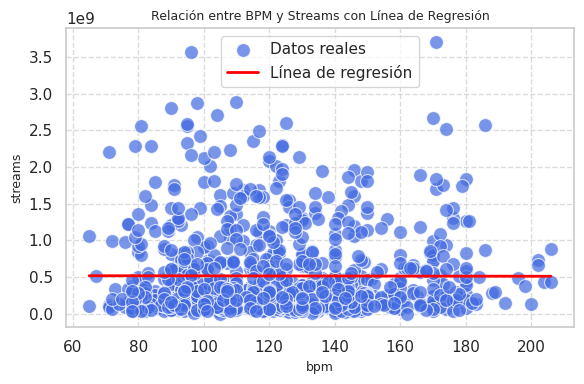

In [28]:
### Hipotesis 1 _ Las canciones con un mayor BPM (Beats Por Minuto) tienen más éxito en términos de streams en Spotify

X = df['bpm']  # Variable independiente
y = df['streams_limpio']  # Variable dependiente

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
print(f"Intercepto (const): {modelo.params['const']:.4f}")
print(f"Coeficiente (bpm): {modelo.params['bpm']:.4f}")
#print(f"Error estándar (const): {modelo.bse['const']:.4f}")
#print(f"Error estándar (bpm): {modelo.bse['bpm']:.4f}")
print(f"Valor p (bpm): {modelo.pvalues['bpm']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")

# Obtener los coeficientes del modelo
intercepto = modelo.params['const']
coeficiente = modelo.params['bpm']

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Estilo del gráfico
sns.scatterplot(x='bpm', y='streams_limpio', data=df, color='royalblue', s=100, edgecolor='w', alpha=0.7, label='Datos reales')

# Añadir la línea de regresión
x_values = np.linspace(df['bpm'].min(), df['bpm'].max(), 100)
y_values = intercepto + coeficiente * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Personalización de etiquetas y título
plt.xlabel('bpm', fontsize=9)
plt.ylabel('streams', fontsize=9)
plt.title('Relación entre BPM y Streams con Línea de Regresión', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
# Verificar valores faltantes en las variables independientes
print(df[['in_apple_charts', 'in_deezer_charts', 'in_spotify_charts']].isna().sum())

# Verificar valores infinitos en las variables independientes
print((df[['in_apple_charts', 'in_deezer_charts', 'in_spotify_charts']] == float('inf')).sum())
print((df[['in_apple_charts', 'in_deezer_charts', 'in_spotify_charts']] == float('-inf')).sum())


in_apple_charts      0
in_deezer_charts     0
in_spotify_charts    0
dtype: int64
in_apple_charts      0
in_deezer_charts     0
in_spotify_charts    0
dtype: int64
in_apple_charts      0
in_deezer_charts     0
in_spotify_charts    0
dtype: int64


Resumen del Modelo:
Intercepto (const): 0.4955
Coeficiente (in_apple_charts): 0.1460
Coeficiente (in_deezer_charts): 1.4769
Valor p (in_apple_charts): 0.0000
Valor p (in_deezer_charts): 0.0000
R-squared: 0.4816
Adj. R-squared: 0.4805


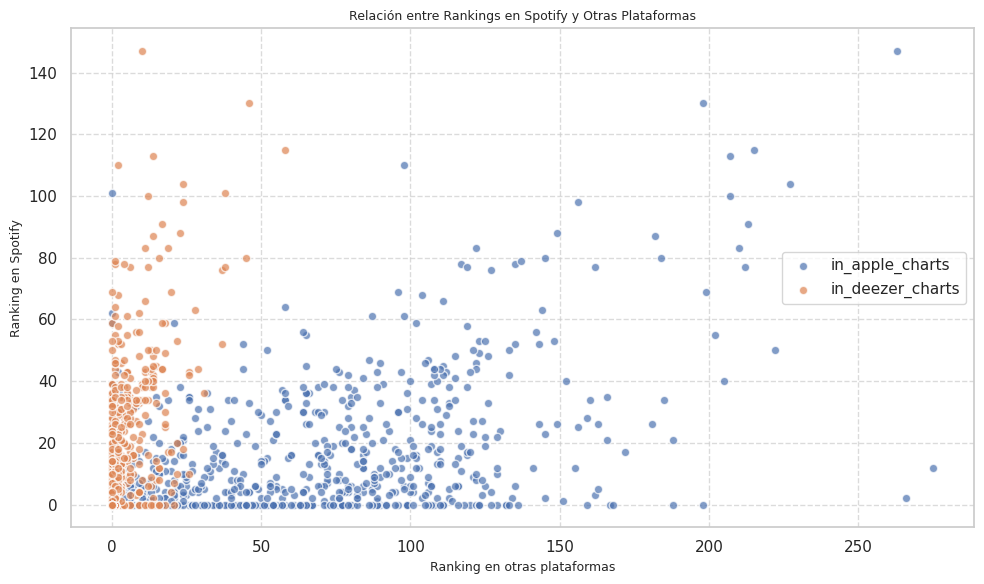

In [30]:
### HIPOTESIS 2 _ Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas como Deezer

# Variables independientes y dependiente
X = df[['in_apple_charts', 'in_deezer_charts']]  # Variables independientes
y = df['in_spotify_charts']  # Variable dependiente

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
print(f"Intercepto (const): {modelo.params['const']:.4f}")
print(f"Coeficiente (in_apple_charts): {modelo.params['in_apple_charts']:.4f}")
print(f"Coeficiente (in_deezer_charts): {modelo.params['in_deezer_charts']:.4f}")
print(f"Valor p (in_apple_charts): {modelo.pvalues['in_apple_charts']:.4f}")
print(f"Valor p (in_deezer_charts): {modelo.pvalues['in_deezer_charts']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Estilo del gráfico

# Graficar los rankings de Spotify contra los rankings de otras plataformas
for column in ['in_apple_charts', 'in_deezer_charts']:
    plt.scatter(df[column], df['in_spotify_charts'], edgecolor='w', alpha=0.7, label=column)

plt.xlabel('Ranking en otras plataformas', fontsize=9)
plt.ylabel('Ranking en Spotify', fontsize=9)
plt.title('Relación entre Rankings en Spotify y Otras Plataformas', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Resumen del Modelo:
Coeficiente (total_participation_playlist): 49766.4289
Valor p (total_participation_playlist): 0.0000
R-squared: 0.6132
Adj. R-squared: 0.6127


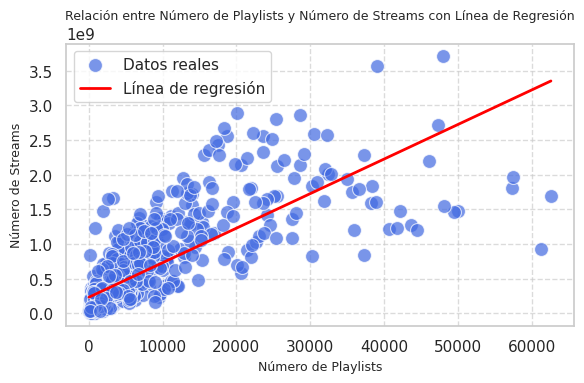

In [31]:
## HIPÓTESIS 3 : La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams

# Variables independientes y dependiente
X = df['total_participation_playlist']  # Variable independiente
y = df['streams_limpio']  # Variable dependiente

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
#print(f"Intercepto (const): {modelo.params['const']:.4f}")
print(f"Coeficiente (total_participation_playlist): {modelo.params['total_participation_playlist']:.4f}")
print(f"Valor p (total_participation_playlist): {modelo.pvalues['total_participation_playlist']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")

# Obtener los coeficientes del modelo
intercepto = modelo.params['const']
coeficiente = modelo.params['total_participation_playlist']

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Estilo del gráfico
sns.scatterplot(x='total_participation_playlist', y='streams_limpio', data=df, color='royalblue', s=100, edgecolor='w', alpha=0.7, label='Datos reales')

# Añadir la línea de regresión
x_values = np.linspace(df['total_participation_playlist'].min(), df['total_participation_playlist'].max(), 100)
y_values = intercepto + coeficiente * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Personalización de etiquetas y título
plt.xlabel('Número de Playlists', fontsize=9)
plt.ylabel('Número de Streams', fontsize=9)
plt.title('Relación entre Número de Playlists y Número de Streams con Línea de Regresión', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Correlación entre número de canciones y total de streams: 0.7810
Resumen del Modelo:
Coeficiente (num_canciones): 500241167.8642
Valor p (num_canciones): 0.0000
R-squared: 0.6099
Adj. R-squared: 0.6093


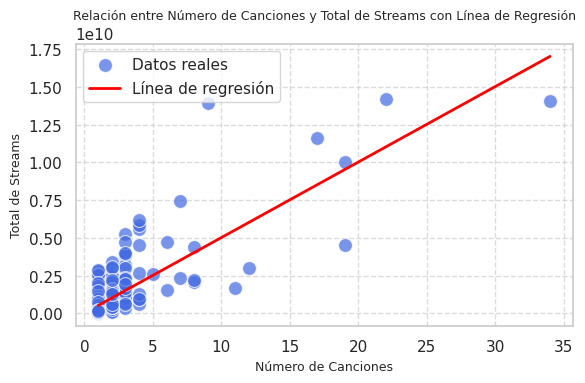

In [34]:
## HIPÓTESIS 4 : Los artistas con un mayor número de canciones en Spotify tienen más streams


# Convertir track_id a cadena si es necesario
df['track_id'] = df['track_id'].astype(str)

# Calcular el número de canciones por artista (usando nunique para contar pistas únicas)
canciones_por_artista = df.groupby('artist_s__name_limpio')['track_id'].nunique().reset_index()
canciones_por_artista.columns = ['artist_s__name_limpio', 'num_canciones']

# Calcular el total de streams por artista
streams_por_artista = df.groupby('artist_s__name_limpio')['streams_limpio'].sum().reset_index()
streams_por_artista.columns = ['artist_s__name_limpio', 'total_streams']

# Combinar los dos DataFrames
artista_df = pd.merge(canciones_por_artista, streams_por_artista, on='artist_s__name_limpio')

# Variables independientes y dependiente
X = artista_df[['num_canciones']]  # Variable independiente
y = artista_df['total_streams']    # Variable dependiente

# Calcular la correlación
correlacion = artista_df['num_canciones'].corr(artista_df['total_streams'])
print(f"Correlación entre número de canciones y total de streams: {correlacion:.4f}")

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
print(f"Coeficiente (num_canciones): {modelo.params['num_canciones']:.4f}")
print(f"Valor p (num_canciones): {modelo.pvalues['num_canciones']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")

# Obtener los coeficientes del modelo
intercepto = modelo.params['const']
coeficiente = modelo.params['num_canciones']

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Estilo del gráfico
sns.scatterplot(x='num_canciones', y='total_streams', data=artista_df, color='royalblue', s=100, edgecolor='w', alpha=0.7, label='Datos reales')

# Añadir la línea de regresión
x_values = np.linspace(artista_df['num_canciones'].min(), artista_df['num_canciones'].max(), 100)
y_values = intercepto + coeficiente * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Personalización de etiquetas y título
plt.xlabel('Número de Canciones', fontsize=9)
plt.ylabel('Total de Streams', fontsize=9)
plt.title('Relación entre Número de Canciones y Total de Streams con Línea de Regresión', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Resumen del Modelo:
Coeficiente (danceability_porcentaje): -4090915.1465
Valor p (danceability_porcentaje): 0.0044
Coeficiente (valence_porcentaje): 170213.2475
Valor p (valence_porcentaje): 0.8542
Coeficiente (energy_porcentaje): -1112923.6877
Valor p (energy_porcentaje): 0.4491
Coeficiente (acoustic_porcentaje): -1098375.8000
Valor p (acoustic_porcentaje): 0.2192
Coeficiente (instrumental_porcentaje): -4294662.2598
Valor p (instrumental_porcentaje): 0.0504
Coeficiente (speechen_porcentaje): -5783769.8365
Valor p (speechen_porcentaje): 0.0021
Coeficiente (liveness_porcentaje): -2504991.4363
Valor p (liveness_porcentaje): 0.0626
R-squared: 0.0291
Adj. R-squared: 0.0219


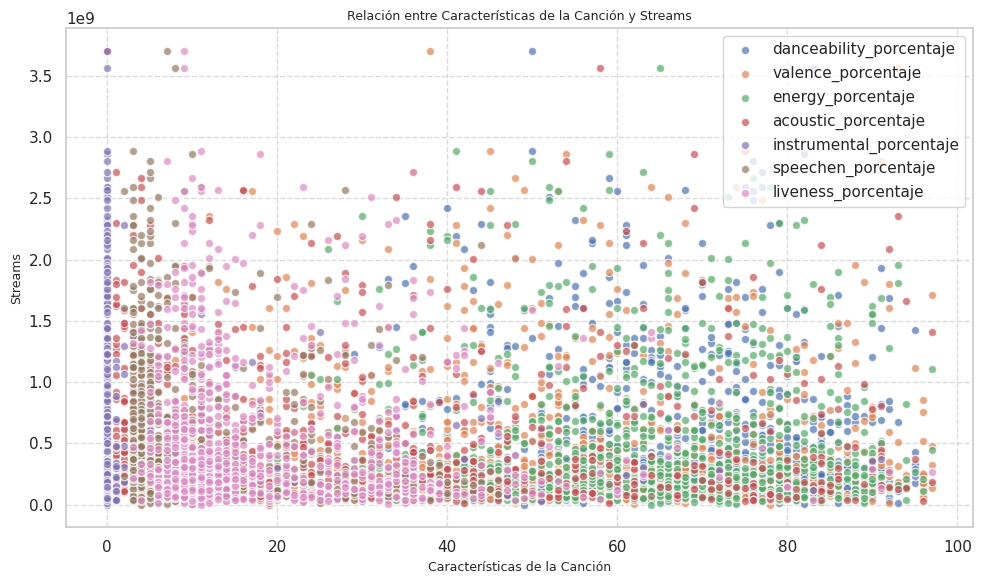

In [36]:
### HIPÓTESIS 5 : Las características de la canción influyen en el éxito en términos de streams en Spotify

# Variables independientes (características de la canción)
X = df[['danceability_porcentaje', 'valence_porcentaje', 'energy_porcentaje',
        'acoustic_porcentaje', 'instrumental_porcentaje', 'speechen_porcentaje',
        'liveness_porcentaje']]

# Variable dependiente (éxito en términos de streams)
y = df['streams_limpio']

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
for var in X.columns[1:]:
    print(f"Coeficiente ({var}): {modelo.params[var]:.4f}")
    print(f"Valor p ({var}): {modelo.pvalues[var]:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Estilo del gráfico

# Graficar los streams contra las características de la canción
for column in X.columns[1:]:
    plt.scatter(df[column], df['streams_limpio'], edgecolor='w', alpha=0.7, label=column)

plt.xlabel('Características de la Canción', fontsize=9)
plt.ylabel('Streams', fontsize=9)
plt.title('Relación entre Características de la Canción y Streams', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
